In [8]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 28.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 31.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.7 MB/s eta 0:00:00


In [10]:
!pip install folium

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import geopandas as gpd
import folium

# Sample data generation for environmental monitoring
np.random.seed(42)
dates = pd.date_range(start='1/1/2020', periods=100, freq='MS')
data = {
    'date': dates,
    'temperature': np.random.normal(20, 5, 100),
    'humidity': np.random.normal(50, 10, 100),
    'pm2_5': np.random.normal(30, 15, 100),
    'latitude': np.random.uniform(-90, 90, 100),
    'longitude': np.random.uniform(-180, 180, 100)
}
df = pd.DataFrame(data)

In [13]:
# Statistical Analysis
mean_temp = df['temperature'].mean()
median_temp = df['temperature'].median()
std_temp = df['temperature'].std()

print(f"Mean Temperature: {mean_temp}")
print(f"Median Temperature: {median_temp}")
print(f"Standard Deviation of Temperature: {std_temp}")

Mean Temperature: 19.48076741302953
Median Temperature: 19.365218541101434
Standard Deviation of Temperature: 4.540842140039003


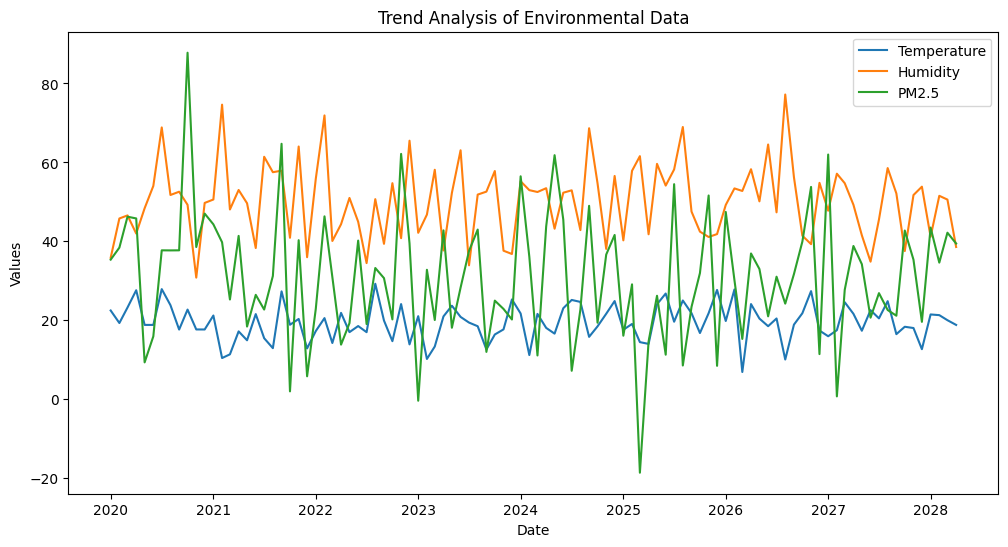

In [14]:
# Trend Analysis
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temperature'], label='Temperature')
plt.plot(df['date'], df['humidity'], label='Humidity')
plt.plot(df['date'], df['pm2_5'], label='PM2.5')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trend Analysis of Environmental Data')
plt.legend()
plt.show()

In [15]:
# Geospatial Analysis
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Geospatial Distribution of Environmental Data')
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

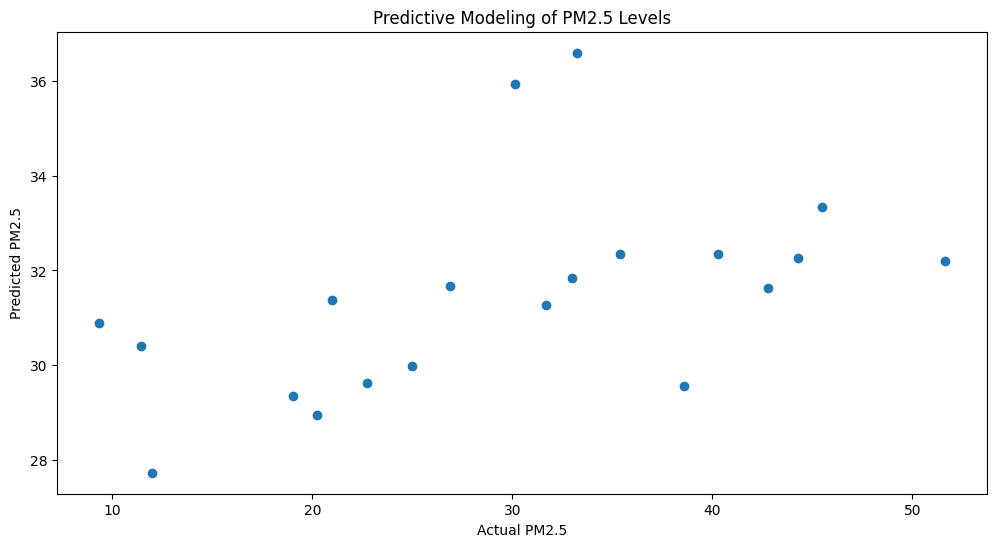

In [18]:
# Predictive Modeling
X = df[['temperature', 'humidity']]
y = df['pm2_5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Predictive Modeling of PM2.5 Levels')
plt.show()

Geospatial analysis map saved as geospatial_analysis.html


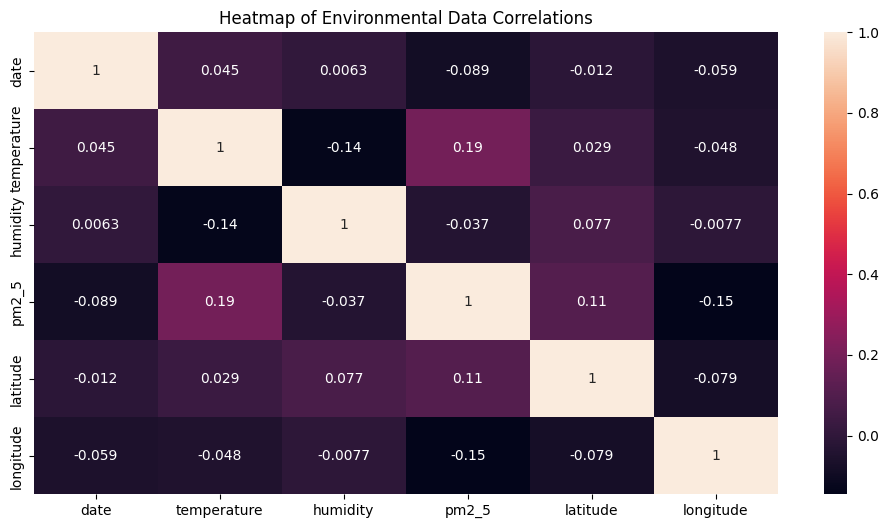

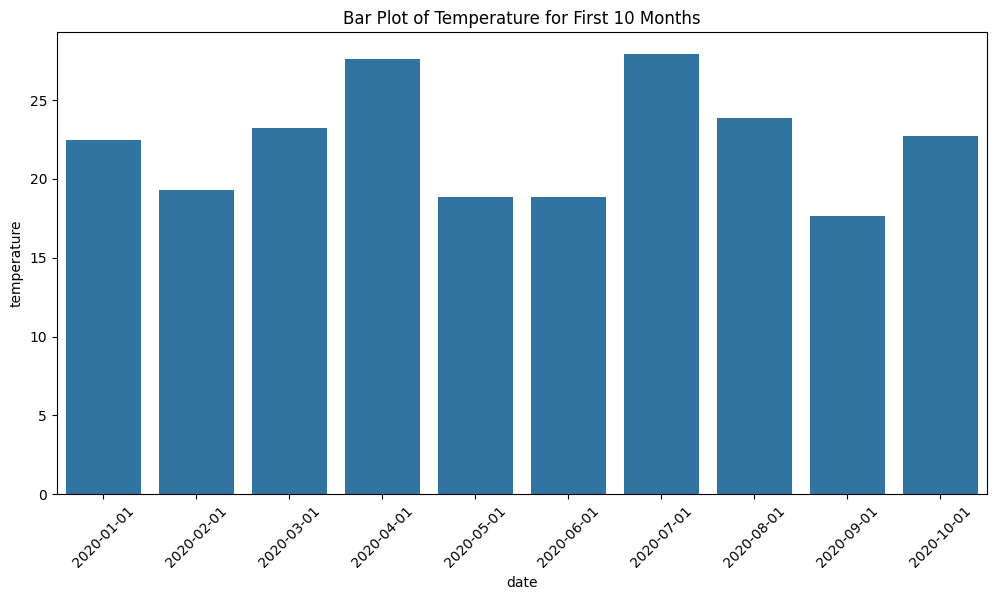

In [19]:
# Visualization using Folium for interactive maps
m = folium.Map(location=[0, 0], zoom_start=2)
for idx, row in df.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(m)

m.save("geospatial_analysis.html")

print("Geospatial analysis map saved as geospatial_analysis.html")

# Additional Visualizations using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of Environmental Data Correlations')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='temperature', data=df.head(10))
plt.xticks(rotation=45)
plt.title('Bar Plot of Temperature for First 10 Months')
plt.show()